In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

Load the Dataset

In [3]:
news_data=pd.read_csv(r'updated_news_data.csv')
news_data

,Position,Title,Type,Stories_Title,Source_Name,Source_Icon,Source_Authors,Link,Thumbnail,Date,...,recency_factor,popularity_score,Sentiment_Score,Compound,Positive,Negative,Neutral,Sentiment_Label,polarity,sentiment_score
0,1,nz women beat sa women nz women won by runs,stories,South Africa vs New Zealand Women's T20 World ...,ESPNcricinfo,https://lh3.googleusercontent.com/1F5q05f6DSmr...,NaN,https://www.espncricinfo.com/series/icc-women-...,"https://img1.hscicdn.com/image/upload/f_auto,t...",2024-10-20 23:01:00+00:00,...,15,0.181078,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,0.291,0.000,0.709,Positive,0.000000,0.000000
1,1,kerr halliday deliver world cup glory on dream...,stories,South Africa vs New Zealand Women's T20 World ...,ESPNcricinfo,https://lh3.googleusercontent.com/1F5q05f6DSmr...,Shashank Kishore,https://www.espncricinfo.com/series/icc-women-...,"https://img1.hscicdn.com/image/upload/f_auto,t...",2024-10-20 19:41:00+00:00,...,15,0.221002,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.6705,0.355,0.000,0.645,Positive,0.000000,0.000000
2,1,new zealand beat south africa to win womens t ...,stories,South Africa vs New Zealand Women's T20 World ...,The Guardian,https://lh3.googleusercontent.com/SU8FywVNtcrG...,Tanya Aldred,https://www.theguardian.com/sport/live/2024/oc...,https://i.guim.co.uk/img/media/c22a7eeed3a4831...,2024-10-20 12:52:00+00:00,...,15,0.712447,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'comp...",0.5859,0.202,0.000,0.798,Positive,0.312121,0.312121
3,2,fakhar zaman set to be dropped from pakistan s...,block,NaN,Hindustan Times,https://lh3.googleusercontent.com/J-YyMvY1q2sk...,NaN,https://www.hindustantimes.com/cricket/fakhar-...,https://www.hindustantimes.com/ht-img/img/2024...,2024-10-20 11:11:00+00:00,...,15,0.413492,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Neutral,-0.166667,-0.166667
4,3,bangladeshi cricketer shakib al hasans fans at...,block,NaN,Al Jazeera English,https://lh3.googleusercontent.com/l-Ps9rkWuApN...,NaN,https://www.aljazeera.com/sports/2024/10/21/ba...,https://www.aljazeera.com/wp-content/uploads/2...,2024-10-21 09:33:00+00:00,...,14,0.082700,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",-0.4588,0.000,0.231,0.769,Negative,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,59,across the ocean how two women in different co...,block,NaN,The News Minute,https://lh3.googleusercontent.com/A7lYAjD037eA...,NaN,https://www.thenewsminute.com/flix/across-ocea...,https://media.assettype.com/tnm/import/sites/d...,2019-09-21 07:00:00+00:00,...,1871,0.723290,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Neutral,0.000000,0.000000
1240,60,the scramble for africa the british empire k...,block,NaN,BBC,https://encrypted-tbn3.gstatic.com/faviconV2?u...,NaN,https://www.bbc.co.uk/bitesize/articles/zrfjqfr,https://bam.files.bbci.co.uk/bam/live/content/...,2022-10-05 02:27:00+00:00,...,761,0.129660,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4019,0.172,0.000,0.828,Positive,0.000000,0.000000
1241,61,what you need to know about droughts why they ...,block,NaN,ABC News,https://lh3.googleusercontent.com/GMhxVNeHdJw8...,Kate Doyle,https://www.abc.net.au/news/2018-08-01/what-yo...,https://live-production.wcms.abc-cdn.net.au/82...,2018-07-31 07:00:00+00:00,...,2288,0.082605,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,Neutral,0.000000,0.000000
1242,62,scientists drilled into earths missing zealand...,block,NaN,UNILAD,https://lh3.googleusercontent.com/YR0kAzu0Xz3o...,Callum Jones,https://www.unilad.com/news/world-news/what-ha...,https://images.ladbible.com/resize?type=webp&q...,2023-09-07 07:00:00+00:00,...,424,0.783654,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou...",-0.2960,0.000,0.180,0.820,Negative,-0.200000,-0.200000


In [4]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Position            1244 non-null   int64  
 1   Title               1244 non-null   object 
 2   Type                1244 non-null   object 
 3   Stories_Title       30 non-null     object 
 4   Source_Name         1244 non-null   object 
 5   Source_Icon         1244 non-null   object 
 6   Source_Authors      818 non-null    object 
 7   Link                1244 non-null   object 
 8   Thumbnail           1221 non-null   object 
 9   Date                1244 non-null   object 
 10  Extracted_Date      1244 non-null   object 
 11  Extracted_Time      1244 non-null   object 
 12  Source_Icon_Domain  1244 non-null   object 
 13  Link_Domain         1244 non-null   object 
 14  Thumbnail_Domain    1221 non-null   object 
 15  title_length        1244 non-null   int64  
 16  source

In [5]:
# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def analyze_sentiment(text):
    return analyzer.polarity_scores(text)
# Apply sentiment analysis to cleaned text
news_data['Sentiment_Score'] = news_data['Title'].apply(analyze_sentiment)

# Extract sentiment values into separate columns
news_data['Compound'] = news_data['Sentiment_Score'].apply(lambda x: x['compound'])
news_data['Positive'] = news_data['Sentiment_Score'].apply(lambda x: x['pos'])
news_data['Negative'] = news_data['Sentiment_Score'].apply(lambda x: x['neg'])
news_data['Neutral'] = news_data['Sentiment_Score'].apply(lambda x: x['neu'])

# Display sentiment scores
print(news_data[['Title', 'Compound', 'Positive', 'Negative', 'Neutral']].head())

                                               Title  Compound  Positive  \
0       nz women beat sa women nz women won by  runs    0.5719     0.291   
1  kerr halliday deliver world cup glory on dream...    0.6705     0.355   
2  new zealand beat south africa to win womens t ...    0.5859     0.202   
3  fakhar zaman set to be dropped from pakistan s...    0.0000     0.000   
4  bangladeshi cricketer shakib al hasans fans at...   -0.4588     0.000   

   Negative  Neutral  
0     0.000    0.709  
1     0.000    0.645  
2     0.000    0.798  
3     0.000    1.000  
4     0.231    0.769  


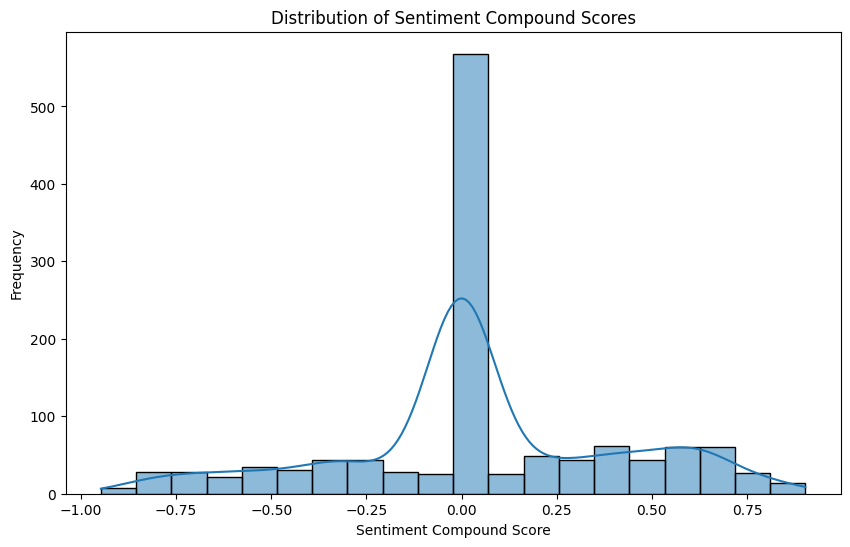

In [6]:
# Plot sentiment compound scores distribution
plt.figure(figsize=(10, 6))
sns.histplot(news_data['Compound'], bins=20, kde=True)
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Classify sentiment as positive, negative, or neutral based on the compound score
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
news_data['Sentiment_Label'] = news_data['Compound'].apply(classify_sentiment)

# Display classified sentiment
print(news_data[['Title', 'Compound', 'Sentiment_Label']].head())


                                               Title  Compound Sentiment_Label
0       nz women beat sa women nz women won by  runs    0.5719        Positive
1  kerr halliday deliver world cup glory on dream...    0.6705        Positive
2  new zealand beat south africa to win womens t ...    0.5859        Positive
3  fakhar zaman set to be dropped from pakistan s...    0.0000         Neutral
4  bangladeshi cricketer shakib al hasans fans at...   -0.4588        Negative


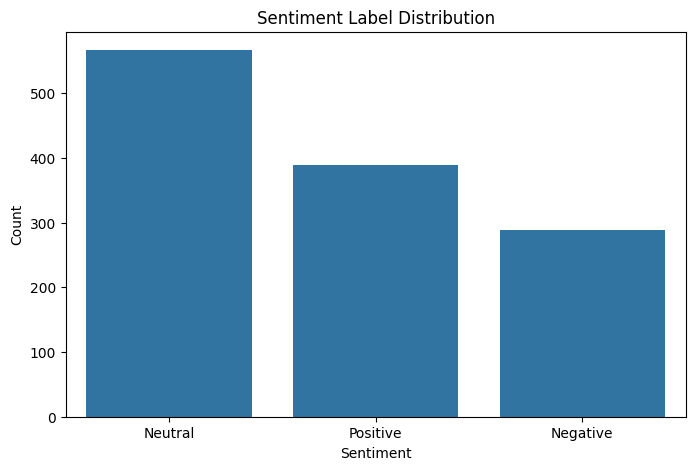

In [8]:
# Count the occurrences of each sentiment label
sentiment_counts = news_data['Sentiment_Label'].value_counts()

# Plot sentiment label distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

      Type  Compound
0    block  0.043062
1  stories  0.002607


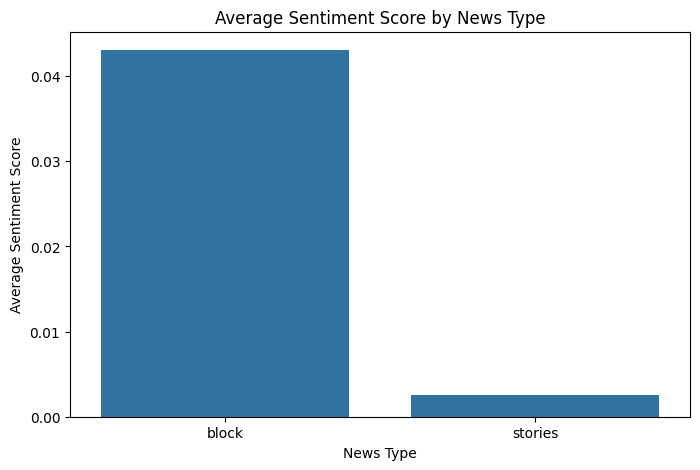

In [9]:
#Group by 'Type' and calculate the mean sentiment scores
type_sentiment = news_data.groupby('Type')['Compound'].mean().reset_index()

# Display the sentiment scores by type of news
print(type_sentiment.head())

# Plot sentiment score by type
plt.figure(figsize=(8, 5))
sns.barplot(x='Type', y='Compound', data=type_sentiment)
plt.title('Average Sentiment Score by News Type')
plt.xlabel('News Type')
plt.ylabel('Average Sentiment Score')
plt.show()


In [10]:
# Sort by compound sentiment score to get most positive and negative news
most_positive = news_data.sort_values(by='Compound', ascending=False).head(5)
most_negative = news_data.sort_values(by='Compound').head(5)

# Display the most positive news headlines
print("Most Positive News:")
print(most_positive[['Title', 'Compound']])

# Display the most negative news headlines
print("\nMost Negative News:")
print(most_negative[['Title', 'Compound']])

Most Positive News:
                                                 Title  Compound
124  i loved andrew garfield and florence pughs we ...    0.9033
71   one of the best pullers in test cricket brett ...    0.8885
873  my perfect day a walk creative work and wonder...    0.8834
408  chiefs win super bowl rematch saquon barkley h...    0.8750
96   pitch perfect from champions new zealand women...    0.8689

Most Negative News:
                                                 Title  Compound
581  india death penalty never the solution to crim...   -0.9474
36   sunil gavaskar highlights unfair sarfaraz snub...   -0.8910
554   indias cancer burden drives generational poverty   -0.8910
545  trudeau india made horrific mistake in violati...   -0.8834
796  mark stoops has no one to blame but himself fo...   -0.8793


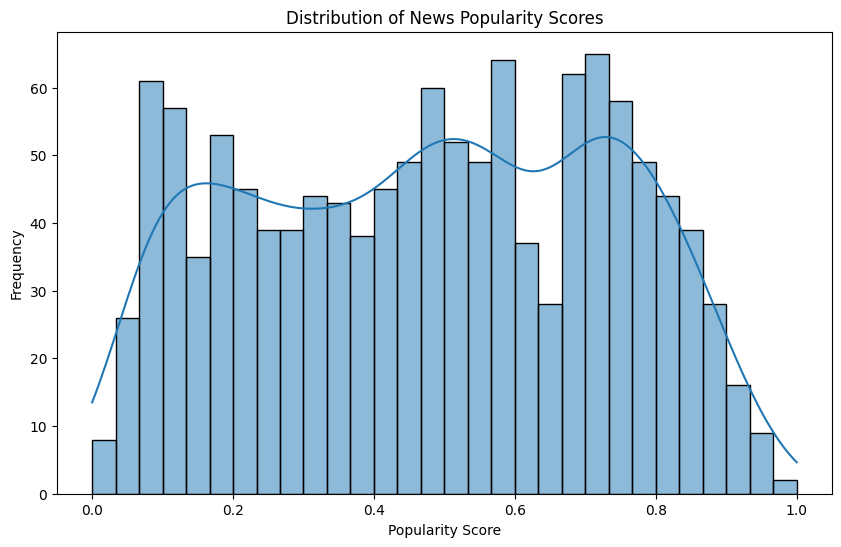

In [11]:
# Distribution of News Popularity Scores
plt.figure(figsize=(10, 6))
sns.histplot(news_data['popularity_score'], bins=30, kde=True)
plt.title('Distribution of News Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_16296\1445185708.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


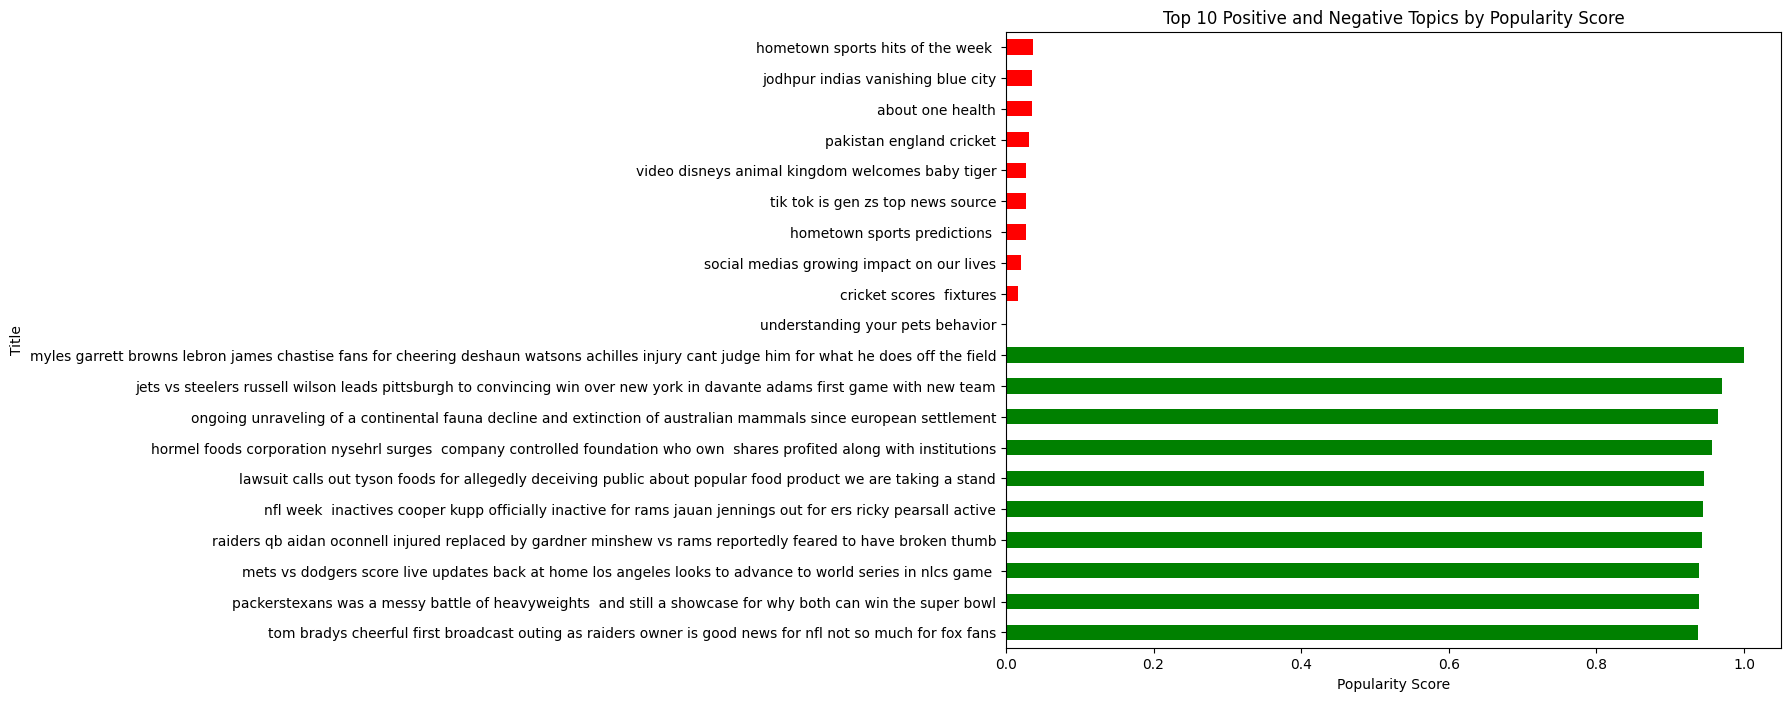

In [12]:
topic_sentiment = news_data.groupby('Title')['popularity_score'].mean().sort_values()

# Get the top 10 and bottom 10 topics by popularity score
top_topics = topic_sentiment.tail(10)  # top 10 highest popularity
bottom_topics = topic_sentiment.head(10)  # bottom 10 lowest popularity

# Combine them into a single DataFrame
combined_topics = pd.concat([top_topics, bottom_topics])

# Plot the results in a single horizontal bar chart
plt.figure(figsize=(10, 8))
colors = ['green'] * 10 + ['red'] * 10  # Green for positive, Red for negative
combined_topics.plot(kind='barh', color=colors)

# Add titles and labels
plt.title('Top 10 Positive and Negative Topics by Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Title')

plt.tight_layout()
plt.show()

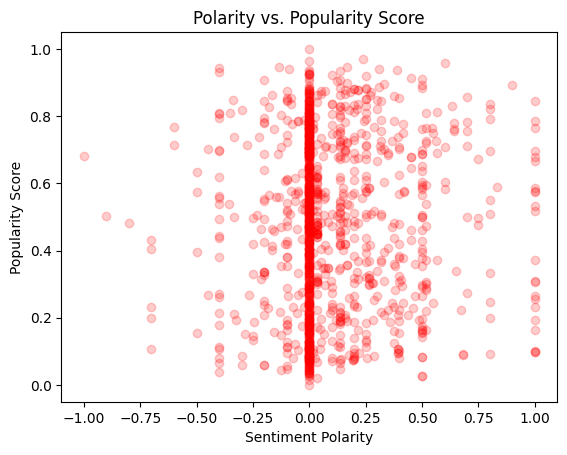

In [13]:
# Calculate polarity score
news_data['polarity'] = news_data['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot polarity vs. popularity score
plt.scatter(news_data['polarity'], news_data['popularity_score'], alpha=0.2, color='red')
plt.title('Polarity vs. Popularity Score')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Popularity Score')
plt.show()


In [14]:
# Assuming 'article_text' is the column containing text data
news_data['sentiment_score'] = news_data['Title'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Display the first few rows to verify
print(news_data[['Title', 'sentiment_score']].head())

news_data.to_csv('updated_news_data.csv',index=False)


                                               Title  sentiment_score
0       nz women beat sa women nz women won by  runs         0.000000
1  kerr halliday deliver world cup glory on dream...         0.000000
2  new zealand beat south africa to win womens t ...         0.312121
3  fakhar zaman set to be dropped from pakistan s...        -0.166667
4  bangladeshi cricketer shakib al hasans fans at...         0.000000


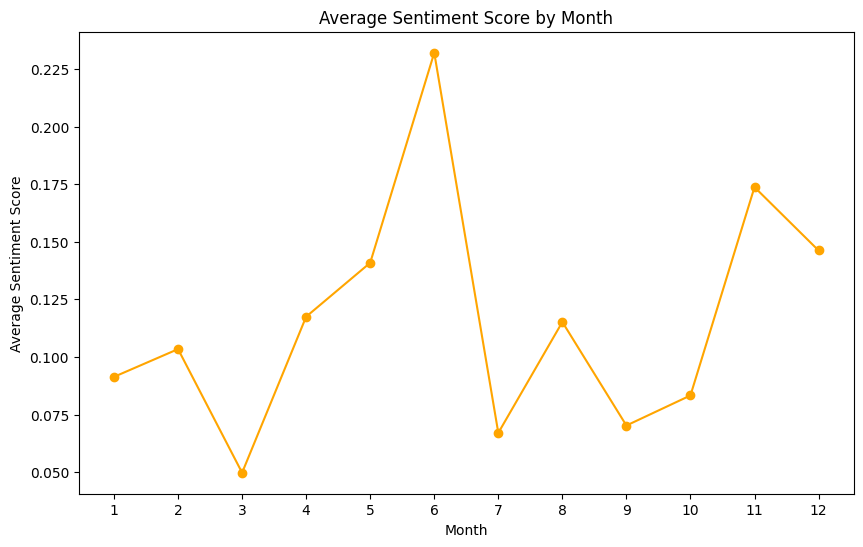

In [15]:
# seasonal trends in sentiment scores
news_data['Extracted_Date'] = pd.to_datetime(news_data['Extracted_Date'], errors='coerce')

# Extract month
news_data['month'] = news_data['Extracted_Date'].dt.month

# Plot sentiment score by month
plt.figure(figsize=(10, 6))
monthly_sentiment = news_data.groupby('month')['sentiment_score'].mean()
monthly_sentiment.plot(marker='o', color='orange')
plt.title('Average Sentiment Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.xticks(range(1, 13))
plt.show()


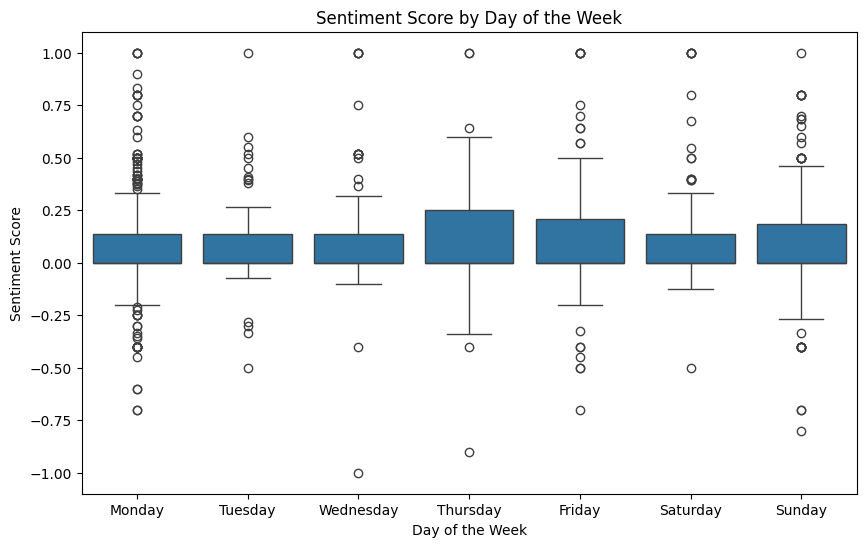

In [16]:
# sentiment vary across days of the week
news_data['Extracted_Date'] = pd.to_datetime(news_data['Extracted_Date'], errors='coerce')
# Extract day of the week
news_data['day_of_week'] = news_data['Extracted_Date'].dt.day_name()

# Plot sentiment by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=news_data, x='day_of_week', y='sentiment_score', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sentiment Score by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sentiment Score')
plt.show()


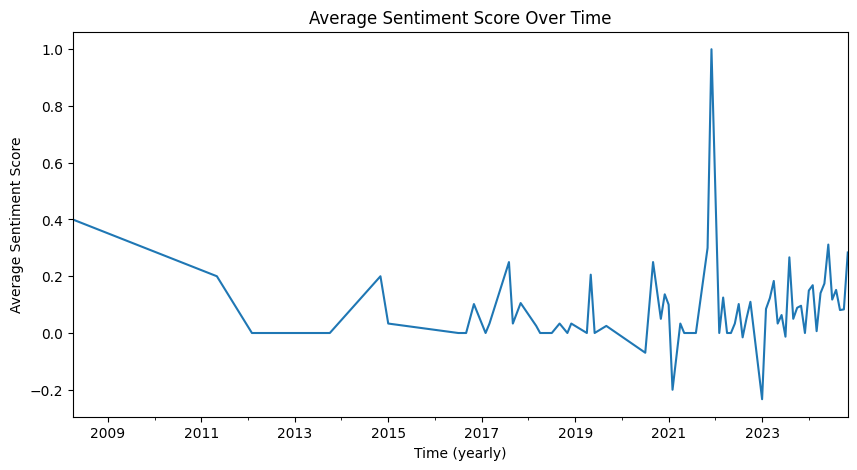

In [17]:
# Plot sentiment over time
# Convert 'extracted_date' to datetime format if it's not already
news_data['extracted_date'] = pd.to_datetime(news_data['extracted_date'], errors='coerce')

# Now group by month and calculate the average sentiment score, then plot
plt.figure(figsize=(10, 5))
news_data.groupby(news_data['extracted_date'].dt.to_period("M"))['sentiment_score'].mean().plot()
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Time (yearly)')
plt.ylabel('Average Sentiment Score')
plt.show()


<Figure size 1400x700 with 0 Axes>

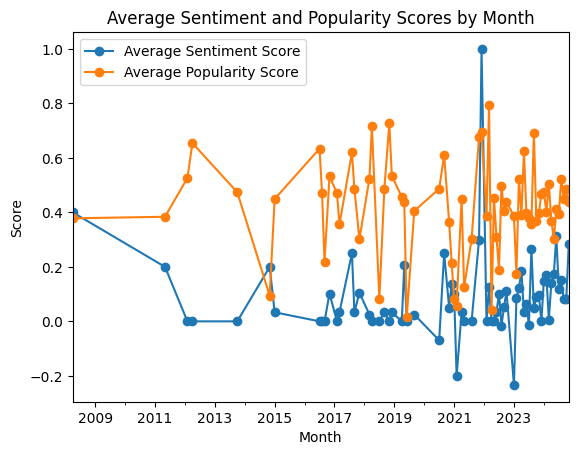

In [18]:
news_data['Extracted_Date'] = pd.to_datetime(news_data['Extracted_Date'], errors='coerce')

# Group by month and calculate mean sentiment and popularity scores
monthly_stats = news_data.groupby(news_data['Extracted_Date'].dt.to_period("M")).agg({'sentiment_score': 'mean', 'popularity_score': 'mean'})

# Plot
plt.figure(figsize=(14, 7))
monthly_stats.plot(kind='line', marker='o', title='Average Sentiment and Popularity Scores by Month')
plt.xlabel('Month')
plt.ylabel('Score')
plt.legend(['Average Sentiment Score', 'Average Popularity Score'])
plt.show()

Correlation between sentiment score and popularity score: 0.026125700866948515


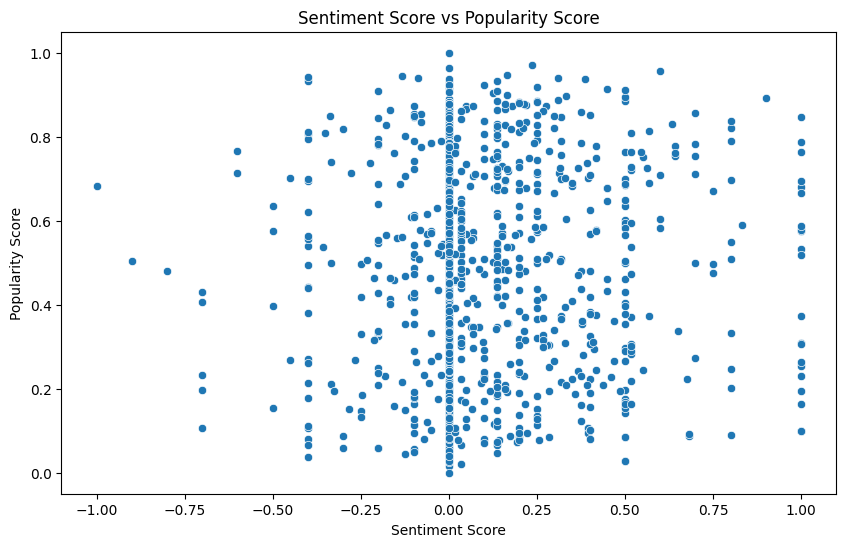

In [19]:
# Correlation between sentiment and popularity
correlation = news_data['sentiment_score'].corr(news_data['popularity_score'])
print("Correlation between sentiment score and popularity score:", correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=news_data, x='sentiment_score', y='popularity_score')
plt.title('Sentiment Score vs Popularity Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Popularity Score')
plt.show()


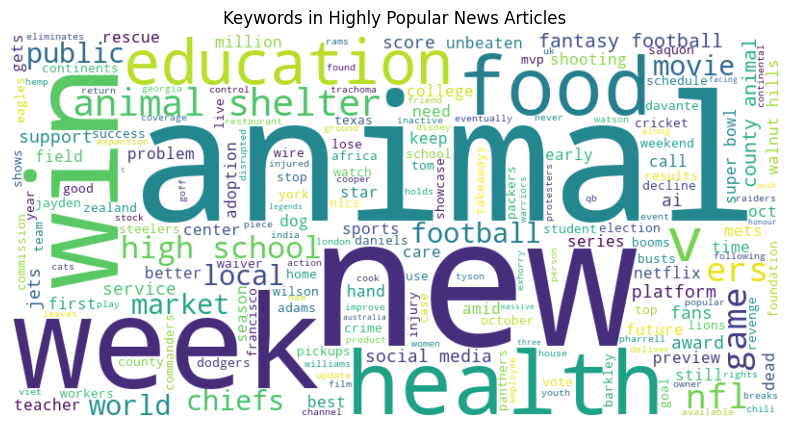

In [20]:
from wordcloud import WordCloud

# Filter top popular articles
top_popular = news_data[news_data['popularity_score'] > news_data['popularity_score'].quantile(0.9)]

# Combine text of top articles
text = ' '.join(top_popular['Title'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords in Highly Popular News Articles')
plt.show()


In [21]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Split text into words and filter out stopwords
filtered_words = [word for word in text.split() if word.lower() not in stop_words]

# Count frequency of filtered words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # Top 20 keywords

# Display most common keywords
print("Top keywords in popular news articles (excluding stopwords):")
for word, count in common_words:
    print(f"{word}: {count}")


Top keywords in popular news articles (excluding stopwords):
animal: 24
new: 14
week: 14
health: 12
win: 9
football: 9
education: 8
county: 7
vs: 7
foods: 7
high: 6
school: 6
nfl: 6
game: 6
fantasy: 6
ers: 6
shelter: 6
market: 5
public: 5
chiefs: 5


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Define thresholds for positive and negative sentiment
positive_articles = news_data[news_data['sentiment_score'] > 0.5]
negative_articles = news_data[news_data['sentiment_score'] < -0.5]

# Extract keywords from positive sentiment articles
positive_text = ' '.join(positive_articles['Title'].dropna())
positive_words = [word for word in positive_text.split() if word.lower() not in stop_words]
positive_word_counts = Counter(positive_words).most_common(20)

# Extract keywords from negative sentiment articles
negative_text = ' '.join(negative_articles['Title'].dropna())
negative_words = [word for word in negative_text.split() if word.lower() not in stop_words]
negative_word_counts = Counter(negative_words).most_common(20)

# Display results
print("Top keywords in positive sentiment articles:")
for word, count in positive_word_counts:
    print(f"{word}: {count}")
print("\nTop keywords in negative sentiment articles:")
for word, count in negative_word_counts:
    print(f"{word}: {count}")


Top keywords in positive sentiment articles:
best: 49
movies: 23
social: 14
media: 14
win: 9
tools: 9
october: 7
management: 7
netflix: 6
halloween: 5
one: 4
good: 4
new: 4
watch: 4
ranked: 4
stream: 4
right: 4
foods: 4
horror: 3
great: 3

Top keywords in negative sentiment articles:
bad: 4
india: 4
rohit: 2
mistake: 2
food: 2
three: 1
hours: 1
cricket: 1
going: 1
dictate: 1
team: 1
gambhir: 1
blamed: 1
shattering: 1
akash: 1
deeps: 1
confidence: 1
ashwin: 1
stance: 1
nz: 1


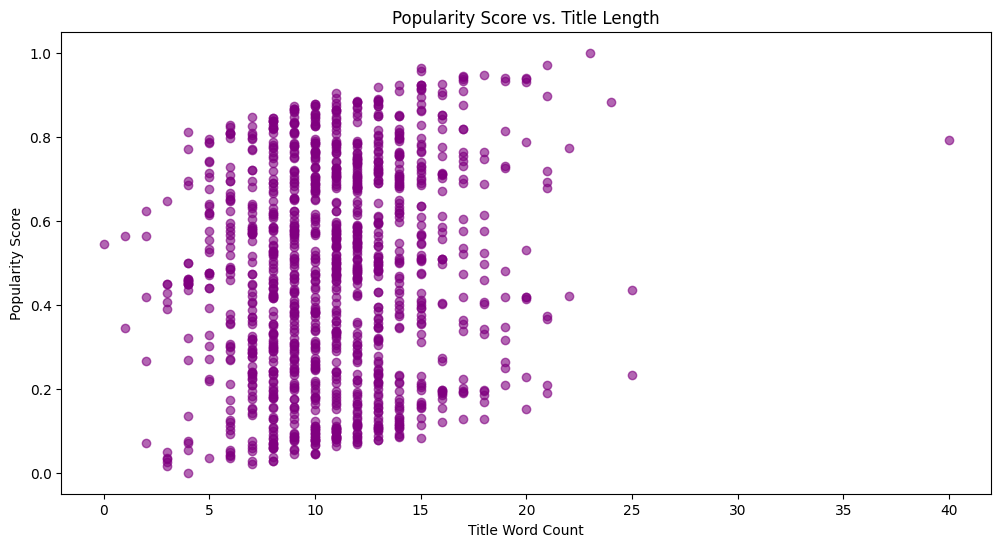

In [23]:
# Calculate word count for each title
news_data['title_word_count'] = news_data['Title'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Plot popularity vs. title word count
plt.figure(figsize=(12, 6))
plt.scatter(news_data['title_word_count'], news_data['popularity_score'], alpha=0.6, color='purple')
plt.xlabel('Title Word Count')
plt.ylabel('Popularity Score')
plt.title('Popularity Score vs. Title Length')
plt.show()


In [24]:
# Investigate Most Common Phrases in Popular Articles

from sklearn.feature_extraction.text import CountVectorizer

# Vectorize with n-grams (bigrams)
vectorizer = CountVectorizer(stop_words='english', ngram_range=(2, 2))
bigram_matrix = vectorizer.fit_transform(top_popular['Title'].dropna())

# Sum bigram frequencies
bigram_counts = bigram_matrix.sum(axis=0)
bigrams = [(word, bigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:20]  # Top 20 bigrams

# Display results
print("Top bigrams in popular articles:")
for phrase, count in bigrams:
    print(f"{phrase}: {count}")


Top bigrams in popular articles:
high school: 6
animal shelter: 6
fantasy football: 5
county animal: 5
social media: 4
super bowl: 3
football game: 3
walnut hills: 3
local animal: 3
new zealand: 2
nlcs game: 2
world series: 2
football waiver: 2
waiver wire: 2
wire early: 2
early pickups: 2
pickups week: 2
new york: 2
davante adams: 2
field goal: 2


In [26]:
# most common n-grams (bigrams or trigrams) in positive and negative articles
from nltk.util import ngrams

def get_ngrams(text_series, n):
    words = ' '.join(text_series).lower()
    tokens = nltk.word_tokenize(words)
    n_grams = ngrams(tokens, n)
    return Counter(n_grams).most_common(10)

# Get bigrams and trigrams for positive and negative articles
positive_bigrams = get_ngrams(positive_articles, 2)
negative_bigrams = get_ngrams(negative_articles, 2)

print('Most Common Bigrams in Positive Articles:')
print(positive_bigrams)
print('Most Common Bigrams in Negative Articles:')
print(negative_bigrams)



Most Common Bigrams in Positive Articles:
[(('position', 'title'), 1), (('title', 'type'), 1), (('type', 'stories_title'), 1), (('stories_title', 'source_name'), 1), (('source_name', 'source_icon'), 1), (('source_icon', 'source_authors'), 1), (('source_authors', 'link'), 1), (('link', 'thumbnail'), 1), (('thumbnail', 'date'), 1), (('date', 'extracted_date'), 1)]
Most Common Bigrams in Negative Articles:
[(('position', 'title'), 1), (('title', 'type'), 1), (('type', 'stories_title'), 1), (('stories_title', 'source_name'), 1), (('source_name', 'source_icon'), 1), (('source_icon', 'source_authors'), 1), (('source_authors', 'link'), 1), (('link', 'thumbnail'), 1), (('thumbnail', 'date'), 1), (('date', 'extracted_date'), 1)]


Unique values in y_true: ['Positive' 'Neutral' 'Negative']
Unique values in y_pred: ["{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.5719}"
 "{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.6705}"
 "{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.5859}"
 "{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
 "{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.4588}"
 "{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'compound': -0.4939}"
 "{'neg': 0.0, 'neu': 0.764, 'pos': 0.236, 'compound': 0.5719}"
 "{'neg': 0.179, 'neu': 0.596, 'pos': 0.225, 'compound': 0.1779}"
 "{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'compound': -0.5423}"
 "{'neg': 0.308, 'neu': 0.616, 'pos': 0.076, 'compound': -0.7096}"
 "{'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}"
 "{'neg': 0.131, 'neu': 0.549, 'pos': 0.32, 'compound': 0.4767}"
 "{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}"
 "{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.2732}"
 "{'neg': 0.0, 'ne

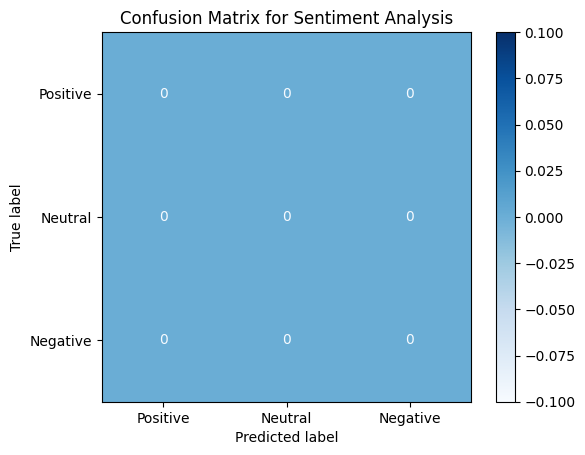

In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure both columns have consistent data types and categories
y_true = news_data['Sentiment_Label'].astype(str)   # Convert to string if not already
y_pred = news_data['Sentiment_Score'].astype(str)   # Convert to string if not already

# Check for unique values in each column to confirm categories match
print("Unique values in y_true:", y_true.unique())
print("Unique values in y_pred:", y_pred.unique())

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Positive', 'Neutral', 'Negative'])  # Specify classes

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Uncomment and load your file

# Define feature columns (e.g., use numerical/text features as needed) and the target column
X = news_data[['title_length', 'recency_factor', 'popularity_score']]  # Example features; adjust as needed
y = news_data['Sentiment_Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print detailed classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Cross-validation for classification model
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())


Model Evaluation Metrics:
Accuracy: 0.4457831325301205
Precision: 0.42961589949541756
Recall: 0.4457831325301205
F1 Score: 0.43155256055285646

Classification Report:
               precision    recall  f1-score   support

    Negative       0.33      0.20      0.25        64
     Neutral       0.51      0.61      0.55       110
    Positive       0.40      0.41      0.41        75

    accuracy                           0.45       249
   macro avg       0.41      0.41      0.40       249
weighted avg       0.43      0.45      0.43       249


Confusion Matrix:
 [[13 32 19]
 [15 67 28]
 [11 33 31]]

Cross-Validation Accuracy Scores: [0.3935743  0.38955823 0.43373494 0.41767068 0.50403226]
Average Cross-Validation Accuracy: 0.4277140821349915
